/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: ComplexWarning: Casting complex values to real discards the imaginary part


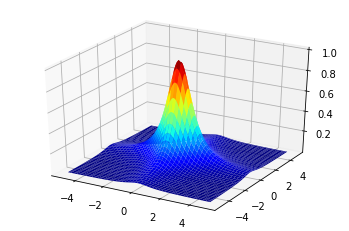

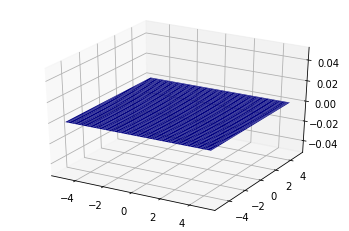

In [ ]:
#4вариант: rect(x/4)
# =0   |x/4|>1/2
# =1/2 |x/4|=1/2
# =1   |x/4|<1/2
#Для аналитики применить не финитное преобразование.

import numpy as np
import matplotlib.pyplot as plt
import math

#одномерный гауссов пучок
def f_x(x):
  return np.exp(-(x**2))

#двумерный гауссов пучок
def f_xy(x,y):
  gauss_matrix = np.zeros((N, N))
  for i in range (N):
    for j in range (N):
      gauss_matrix[i][j] = np.exp(-x[i]**2 - y[j]**2)
  return gauss_matrix
#def f_xy_(x,y):
#x, y = np.meshgrid(x, y)
#g = np.exp(-(x**2)-(y**2))

def f_veta1(x):
  return 1/(x**2+1)

def f_Veta2(x, y):
  veta_matrix = np.zeros((N, N))
  vX=f_veta1(x);
  vY=f_veta1(y);
  for i in range(N):
    for j in range(N):
      veta_matrix[i][j] = vX[i] * vY[j]
  return veta_matrix

#входной сигнал одномерный rect
def rect1(x):
  N = len(x)
  rect = [0] * N
  for i in range(N):
    if abs(x[i])>2:
      rect[i]= 0
    elif abs(x[i])<2:
      rect[i]=1
    else: rect[i]=0.5
  return rect

#входной сигнал двумерный rect
def rect2(x,y):
  rect_matrix = np.zeros((N, N))
  rectX=rect1(x);
  rectY=rect1(y);
  for i in range(N):
    for j in range(N):
      rect_matrix[i][j] = rectX[i] * rectY[j]
  return rect_matrix


#аналитическое преобразование Фурье
def analytical_1d(f, x, u):
  F_ksi= [0]*N
  a=x[N-1]
  F=0

  b= (N **2) / (4 * a * M)
  h_x = (2*a) / (N-1)
  h_u = (2*b) / (N-1)
  
  for k in range (N):
    for l in range (N):
      F += f[l]*h_x*np.exp(-2*math.pi*1j*x[l]*((-1)*b + k * h_u))
    F_ksi[k] = F
    F = 0         
  return F_ksi

#аналитическое ПФ для rect
def analytical_rect(x,u):
  return np.sin(4*np.pi*u)/(np.pi*u)


# Двухмерное аналитическое решение
def analytical_2d(F_analytical, N):
  analytical_2d = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      analytical_2d[i][j] = F_analytical[i] * F_analytical[j]
  return analytical_2d

# БПФ одномерное
def bpf_1d(f, N, M, hx):
  f_ =np.zeros(N)
  # Дополним вектор f необходимым числом нулей до размерности M
  f_ = np.append(f[int(N//2):], np.zeros(M - N))
  # Разбить вектор f на две половины и поменять их местами.
  f_ = np.append(f_, f[:N // 2])
  # БПФ от f
  fft = np.fft.fft(f_, M)
  # умножить результат на шаг 
  fft = hx * fft
  # "Вырезать" центральную часть вектора F, оставив центральные N элементов.
  return np.append(fft[M - N // 2:], fft[:N // 2])

# двухмерное быстрое преобразование Фурье
def bpf_2d(f, N, M, hx):
  for i in range(N):
    # проход по строкам
    f[:, i] = bpf_1d(f[:, i], N, M, hx)
  for i in range(N):
    # проход по столбцам
    f[i, :] = bpf_1d(f[i, :], N, M, hx)
  return f

def plot_1d(headline, x, y):
    plt.plot(x, y)
    plt.title(headline)
    plt.grid()
    plt.show()

def plot_2(x, y, z):
  fig = plt.figure()
  axes = fig.add_subplot(projection='3d')
  xgrid, ygrid = np.meshgrid(x, y)
  zgrid = np.abs(z)
  #zgrid = np.meshgrid(z)#np.angle(np.exp(-xgrid**2-ygrid**2))
  axes.plot_surface(xgrid, ygrid, zgrid, cmap='jet')
  plt.show()


N = 512
M = 4096

a = 5
b = (N**2)/(4*a*M)

hx = 2*a/N
hu = 2*b/N

u = np.linspace(-b, b, N+1)
x = np.linspace(-a, a, N+1)
x = x[:-1]
u = u[:-1]

############ gauss 1d
#plot_1d("Амплитуда одномерного гауссова пучка", x, np.abs(f_x(x)))
#plot_1d("Фаза одномерного гауссова пучка", x, np.angle(f_x(x)))
#
#fft = bpf_1d(f_x(x), N, M, 2 * a / N)
#plot_1d("Амплитуда одномерного гауссова пучка после ПФ", u, np.abs(fft))
#plot_1d("Фаза одномерного гауссова пучка после ПФ", u, np.angle(fft))
#
#fft_integral = analytical_1d(f_x(x), x, u)
#plot_1d("Амплитуда одномерного гауссова пучка после аналитического преобразования", u, np.abs(fft_integral))
#plot_1d("Фаза одномерного гауссова пучка после аналитического преобразования", u, np.angle(fft_integral))

############# rect 1d
#plot_1d("Амплитуда одномерной функции по варианту", x, np.abs(rect1(x)))
#plot_1d("Фаза одномерной функции по варианту", x, np.angle(rect1(x)))
#
#fft_rect = bpf_1d(rect1(x), N, M, 2 * a / N)
#plot_1d("Амплитуда одномерной функции по варианту после ПФ", u, np.abs(fft_rect))
#plot_1d("Фаза одномерной функции по варианту после ПФ", u, np.angle(fft_rect))
#
#fft_rect_integral = analytical_rect(x, u)    
#plot_1d("Амплитуда одномерной функции по варианту после аналитического преобразования", u, np.abs(fft_rect_integral))
#plot_1d("Фаза одномерной функции по варианту после аналитического преобразования", u, np.angle(fft_rect_integral))

#fft_rect_integral1 = bpf_2d(rect1(x), N, M, 2 * a / (N-1)) 
#fft_rect_integral1 = analytical_1d(rect1(x), x, u)   
#plot_1d("Амплитуда одномерной функции по варианту после аналитического преобразования", u, np.abs(fft_rect_integral1))
#plot_1d("Фаза одномерной функции по варианту после аналитического преобразования", u, np.angle(fft_rect_integral1))

############ gauss 2d
#plot_2(x, x, f_xy(x, x), "Gauss")
#plot_2("Фаза двумерного гауссова пучка", x, x, np.angle(f_xy(x, x)))

#ft_2d = bpf_2d(f_xy(x, x), N, M, 2 * a / N)

#plot_2("Амплитуда двумерного гауссова пучка после ПФ", x, x, np.abs(ft_2d))
#plot_2("фаза двумерного гауссова пучка после ПФ", x, x, np.angle(ft_2d))

############ rect 2d
#plot_2("Амплитуда двумермерной функции по варианту", x, x, np.abs(rect2(x, x)))
#plot_2("Фаза двумерной функции по варианту", x, x, np.angle(rect2(x, x)))

#ft_2d_rect = bpf_2d(rect2(x, x), N, M, 2 * a / N)

#plot_2("Амплитуда двумерной функции по варианту после ПФ", x, x, np.abs(ft_2d_rect))
#plot_2("фаза двумерной функции по варианту после ПФ", x, x, np.angle(ft_2d_rect))


#Вете
############ 1/(x^2+1)
ft_2d_V = bpf_2d(f_Veta2(x, x), N, M, 2 * a / N)
plot_2(x, x, np.abs(f_Veta2(x, x)))
plot_2(x, x, np.angle(f_Veta2(x, x)))

#ft_2d = bpf_2d(f_xy(x, x), N, M, 2 * a / N)

#plot_2("Амплитуда двумерного гауссова пучка после ПФ", x, x, np.abs(ft_2d))
#plot_2("фаза двумерного гауссова пучка после ПФ", x, x, np.angle(ft_2d))

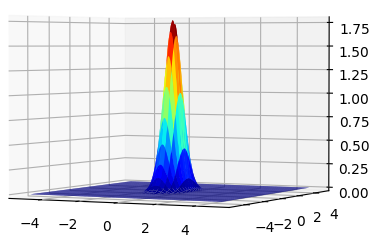

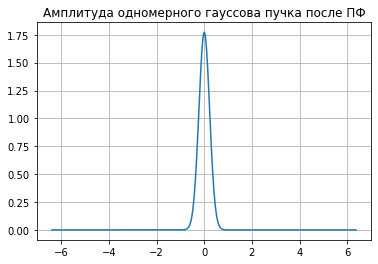

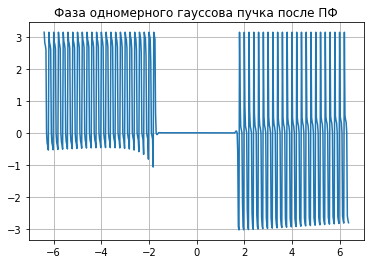

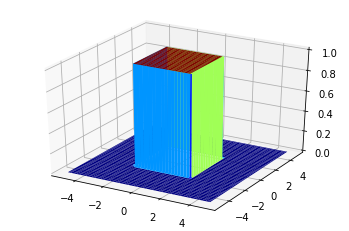

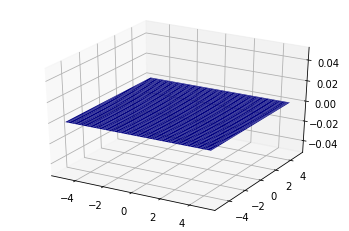

In [ ]:
#4вариант: rect(x/4)
# =0   |x/4|>1/2
# =1/2 |x/4|=1/2
# =1   |x/4|<1/2
#Для аналитики применить не финитное преобразование.

import numpy as np
import matplotlib.pyplot as plt
import math

#одномерный гауссов пучок
def f_x(x):
  return np.exp(-(x**2))

#двумерный гауссов пучок
def f_xy(x,y):
  gauss_matrix = np.zeros((N, N))
  for i in range (N):
    for j in range (N):
      gauss_matrix[i][j] = np.exp(-x[i]**2 - y[j]**2)
  return gauss_matrix
#def f_xy_(x,y):
#x, y = np.meshgrid(x, y)
#g = np.exp(-(x**2)-(y**2))


#входной сигнал одномерный rect
def rect1(x):
  N = len(x)
  rect = [0] * N
  for i in range(N):
    if abs(x[i])>2:
      rect[i]= 0
    elif abs(x[i])<2:
      rect[i]=1
    else: rect[i]=0.5
  return rect

#входной сигнал двумерный rect
def rect2(x,y):
  rect_matrix = np.zeros((N, N))
  rectX=rect1(x);
  rectY=rect1(y);
  for i in range(N):
    for j in range(N):
      rect_matrix[i][j] = rectX[i] * rectY[j]
  return rect_matrix


#аналитическое преобразование Фурье
def analytical_1d(f, x, u):
  F_ksi= [0]*N

  a=x[N-1]
  b= (N **2) / (4 * a * M)
  h_x = (2*a) / (N-1)
  h_u = (2*b) / (N-1)
  F=0
  for k in range (N):
    for l in range (N):
      F += f[l]*h_x*np.exp(-2*math.pi*1j*x[l]*((-1)*b + k * h_u))
    F_ksi[k] = F
    F = 0         
  return F_ksi

#аналитическое ПФ для rect
def analytical_rect(x,u):
  return np.sin(4*np.pi*u)/(np.pi*u)


# Двухмерное аналитическое решение
def analytical_2d(F_analytical, N):
  analytical_2d = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      analytical_2d[i][j] = F_analytical[i] * F_analytical[j]
  return analytical_2d

# БПФ одномерное
def bpf_1d(f, N, M, hx):
  f_ =np.zeros(N)
  # Дополним вектор f необходимым числом нулей до размерности M
  f_ = np.append(f[int(N//2):], np.zeros(M - N))
  # Разбить вектор f на две половины и поменять их местами.
  f_ = np.append(f_, f[:N // 2])
  # БПФ от f
  fft = np.fft.fft(f_, M)
  # умножить результат на шаг 
  fft = hx * fft
  # "Вырезать" центральную часть вектора F, оставив центральные N элементов.
  return np.append(fft[M - N // 2:], fft[:N // 2])

# двухмерное быстрое преобразование Фурье
def bpf_2d(f, N, M, hx):
  for i in range(N):
    #Доступ к столбцам матрицы
    f[:, i] = bpf_1d(f[:, i], N, M, hx)
  for i in range(N):
      #Доступ к строкам матрицы
    f[i, :] = bpf_1d(f[i, :], N, M, hx)
  return f

def plot_1d(headline, x, y):
    plt.plot(x, y)
    plt.title(headline)
    plt.grid()
    plt.show()


def plot_2(x, y, z, label):
  fig = plt.figure()
  axes = fig.add_subplot(projection='3d')
  xgrid, ygrid = np.meshgrid(x, y)
  zgrid = np.abs(z)
  #zgrid = np.angle(z)
  
  axes.plot_surface(xgrid, ygrid, zgrid, cmap='jet')
  plt.show()

def plot_2d(x, y, z, label):
  fig = plt.figure()
  axes = fig.add_subplot(projection='3d')
  xgrid, ygrid = np.meshgrid(x, y)
  zgrid = np.abs(z)
  zgrid = np.angle(z)
  
  axes.plot_surface(xgrid, ygrid, zgrid, cmap='jet')
  plt.show()

N = 512
M = 2048

a = 5
b = (N**2)/(4*a*M)

hx = 2*a/N
hu = 2*b/N

u = np.linspace(-b, b, N)
x = np.linspace(-a, a, N)
x = x[:-1]
u = u[:-1]

############ gauss 1d
#plot_1d("Амплитуда одномерного гауссова пучка", x, np.abs(f_x(x)))
#plot_1d("Фаза одномерного гауссова пучка", x, np.angle(f_x(x)))
#
fft = bpf_1d(f_x(x), N, M, 2 * a / N)
plot_1d("Амплитуда одномерного гауссова пучка после ПФ", u, np.abs(fft))
plot_1d("Фаза одномерного гауссова пучка после ПФ", u, np.angle(fft))
#
#fft_integral = analytical_1d(f_x(x), x, u)
#plot_1d("Амплитуда одномерного гауссова пучка после аналитического преобразования", u, np.abs(fft_integral))
#plot_1d("Фаза одномерного гауссова пучка после аналитического преобразования", u, np.angle(fft_integral))
############# rect 1d

#plot_1d("Амплитуда одномерной функции по варианту", x, np.abs(rect1(x)))
#plot_1d("Фаза одномерной функции по варианту", x, np.angle(rect1(x)))
#
#fft_rect = bpf_1d(rect1(x), N, M, 2 * a / N)
#plot_1d("Амплитуда одномерной функции по варианту после ПФ", u, np.abs(fft_rect))
#plot_1d("Фаза одномерной функции по варианту после ПФ", u, np.angle(fft_rect))
#
#fft_rect_integral = analytical_rect(x, u)    
#plot_1d("Амплитуда одномерной функции по варианту после аналитического преобразования", u, np.abs(fft_rect_integral))
#plot_1d("Фаза одномерной функции по варианту после аналитического преобразования", u, np.angle(fft_rect_integral))

#fft_rect_integral1 = bpf_2d(rect1(x), N, M, 2 * a / (N-1)) 
#fft_rect_integral1 = analytical_1d(rect1(x), x, u)   
#plot_1d("Амплитуда одномерной функции по варианту после аналитического преобразования", u, np.abs(fft_rect_integral1))
#plot_1d("Фаза одномерной функции по варианту после аналитического преобразования", u, np.angle(fft_rect_integral1))

############ gauss 2d
#plot_2d("Амплитуда одномерного гауссова пучка", x, np.abs(f_xy(x, x)))
#plot_2d("Фаза одномерного гауссова пучка", x, np.angle(f_xy(x, x)))

#ft_2d = bpf_2d(f_xy(x, x), N, M, 2 * a / N)

#plot_2d(f_xy(x,x), "Гаусс")
#plot_2d(bpf_2d(f_xy(x, x), N, M, 2 * a / N), "Гаусс после ПФ")

#plot_2(x, x, f_xy(x, x), "Gauss")
#fft_2d_gauss = bpf_2d(f_xy(x, x), N, M, 2 * a / N)
#print(fft_2d_gauss)
#print(len(fft_2d_gauss))
#plot_2(x, x, fft_2d_gauss, "Gauss")

plot_2(x, x, rect2(x,x),"Амплитуда двумерной функции по варианту")
plot_2d(x, x, rect2(x,x),"Фаза двумерной функции по варианту")

#ft_2d_rect = bpf_2d(rect2(x, x), N, M, 2 * a / N)

#plot_2(x, x, ft_2d_rect,"Амплитуда двумерной функции по варианту после ПФ")
#plot_2d(x, x, ft_2d_rect, "фаза двумерной функции по варианту после ПФ")


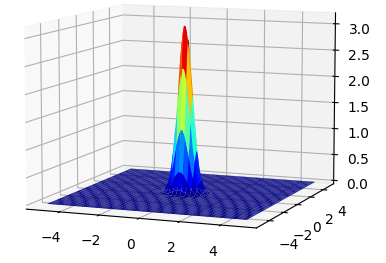